In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

data = pd.read_excel(r'C:\Users\georgia.malach\Downloads\Source code\Sample code first project\QVC_CAWI.xlsx')


In [2]:
cati = data[['StartTime', 'c1', 'c2', 'qsoc', 'segnew2']]

In [3]:
cati['day_of_week'] = cati['StartTime'].dt.day_name()

C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_6464/2428071133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['day_of_week'] = cati['StartTime'].dt.day_name()


In [4]:
cati.StartTime = cati.StartTime.apply(pd.to_datetime)
cati['Day'] = [d.date() for d in cati['StartTime']]
cati['Time'] = [d.time() for d in cati['StartTime']]

C:\Users\georgia.malach\Downloads\Source code\Sample code first project\.venv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_6464/1366518252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['Day'] = [d.date() for d in cati['StartTime']]
C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_6464/1366518252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [5]:
cati['weekend'] = 0
cati.loc[cati['day_of_week'].isin(["Saturday", "Sunday"]), 'weekend'] = 1
cati

C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_6464/727757115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['weekend'] = 0
C:\Users\georgia.malach\Downloads\Source code\Sample code first project\.venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
0,2021-12-13 14:46:17,Female,_55to64,B,FullTime,Monday,2021-12-13,14:46:17,0
1,2021-12-13 14:48:13,Female,_45to54,C2,FullTime,Monday,2021-12-13,14:48:13,0
2,2021-12-13 14:49:12,Female,_65Plus,B,RetiredPrivatePention,Monday,2021-12-13,14:49:12,0
3,2021-12-13 14:55:05,Female,_55to64,B,RetiredPrivatePention,Monday,2021-12-13,14:55:05,0
4,2021-12-13 15:02:01,Female,_65Plus,Refused,PreferNotToSay,Monday,2021-12-13,15:02:01,0
...,...,...,...,...,...,...,...,...,...
1118,2021-12-20 19:24:02,Male,_55to64,C2,FullTime,Monday,2021-12-20,19:24:02,0
1119,2021-12-20 19:27:38,Female,_45to54,Refused,PreferNotToSay,Monday,2021-12-20,19:27:38,0
1120,2021-12-20 19:27:56,Female,_55to64,Refused,FullTime,Monday,2021-12-20,19:27:56,0
1121,2021-12-20 19:38:56,Female,_55to64,C2,FullTime,Monday,2021-12-20,19:38:56,0


In [6]:
cati = cati.dropna(how = 'any', axis = 0)
cati

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
0,2021-12-13 14:46:17,Female,_55to64,B,FullTime,Monday,2021-12-13,14:46:17,0
1,2021-12-13 14:48:13,Female,_45to54,C2,FullTime,Monday,2021-12-13,14:48:13,0
2,2021-12-13 14:49:12,Female,_65Plus,B,RetiredPrivatePention,Monday,2021-12-13,14:49:12,0
3,2021-12-13 14:55:05,Female,_55to64,B,RetiredPrivatePention,Monday,2021-12-13,14:55:05,0
4,2021-12-13 15:02:01,Female,_65Plus,Refused,PreferNotToSay,Monday,2021-12-13,15:02:01,0
...,...,...,...,...,...,...,...,...,...
1118,2021-12-20 19:24:02,Male,_55to64,C2,FullTime,Monday,2021-12-20,19:24:02,0
1119,2021-12-20 19:27:38,Female,_45to54,Refused,PreferNotToSay,Monday,2021-12-20,19:27:38,0
1120,2021-12-20 19:27:56,Female,_55to64,Refused,FullTime,Monday,2021-12-20,19:27:56,0
1121,2021-12-20 19:38:56,Female,_55to64,C2,FullTime,Monday,2021-12-20,19:38:56,0


In [7]:
cati.set_index('StartTime', inplace = True)

In [8]:
cati.reset_index(inplace=True)

In [9]:
from datetime import datetime, date, time

In [10]:
cati.loc[cati["StartTime"].dt.time > time(17, 0), :]

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
18,2021-12-13 17:10:09,Female,_65Plus,E,RetiredStateBenefit,Monday,2021-12-13,17:10:09,0
19,2021-12-13 17:11:23,Female,_65Plus,C1,RetiredPrivatePention,Monday,2021-12-13,17:11:23,0
20,2021-12-13 17:11:33,Female,_65Plus,Refused,RetiredPrivatePention,Monday,2021-12-13,17:11:33,0
21,2021-12-13 17:11:44,Female,_55to64,Refused,PreferNotToSay,Monday,2021-12-13,17:11:44,0
22,2021-12-13 17:11:48,Male,_35to44,C1,FullTime,Monday,2021-12-13,17:11:48,0
...,...,...,...,...,...,...,...,...,...
1118,2021-12-20 19:24:02,Male,_55to64,C2,FullTime,Monday,2021-12-20,19:24:02,0
1119,2021-12-20 19:27:38,Female,_45to54,Refused,PreferNotToSay,Monday,2021-12-20,19:27:38,0
1120,2021-12-20 19:27:56,Female,_55to64,Refused,FullTime,Monday,2021-12-20,19:27:56,0
1121,2021-12-20 19:38:56,Female,_55to64,C2,FullTime,Monday,2021-12-20,19:38:56,0


In [11]:
cati.loc[cati["weekend"] == 1, "conbus"] = "con"

cati.loc[(cati["weekend"] == 0) & (cati["StartTime"].dt.time > time(17, 0)), "conbus"] = "con"
cati.loc[pd.isna(cati["conbus"]), "conbus"] = "bus"
cati

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend,conbus
0,2021-12-13 14:46:17,Female,_55to64,B,FullTime,Monday,2021-12-13,14:46:17,0,bus
1,2021-12-13 14:48:13,Female,_45to54,C2,FullTime,Monday,2021-12-13,14:48:13,0,bus
2,2021-12-13 14:49:12,Female,_65Plus,B,RetiredPrivatePention,Monday,2021-12-13,14:49:12,0,bus
3,2021-12-13 14:55:05,Female,_55to64,B,RetiredPrivatePention,Monday,2021-12-13,14:55:05,0,bus
4,2021-12-13 15:02:01,Female,_65Plus,Refused,PreferNotToSay,Monday,2021-12-13,15:02:01,0,bus
...,...,...,...,...,...,...,...,...,...,...
1118,2021-12-20 19:24:02,Male,_55to64,C2,FullTime,Monday,2021-12-20,19:24:02,0,con
1119,2021-12-20 19:27:38,Female,_45to54,Refused,PreferNotToSay,Monday,2021-12-20,19:27:38,0,con
1120,2021-12-20 19:27:56,Female,_55to64,Refused,FullTime,Monday,2021-12-20,19:27:56,0,con
1121,2021-12-20 19:38:56,Female,_55to64,C2,FullTime,Monday,2021-12-20,19:38:56,0,con


In [12]:
contingency = pd.crosstab(cati['c1'], cati['conbus'])
contingency

conbus,bus,con
c1,,
Female,508,506
Male,35,52
PreferNotToSay,15,7


In [13]:
contingency_pct = pd.crosstab(cati['c1'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
c1,,
Female,0.910394,0.895575
Male,0.062724,0.092035
PreferNotToSay,0.026882,0.012389


<AxesSubplot:xlabel='conbus', ylabel='c1'>

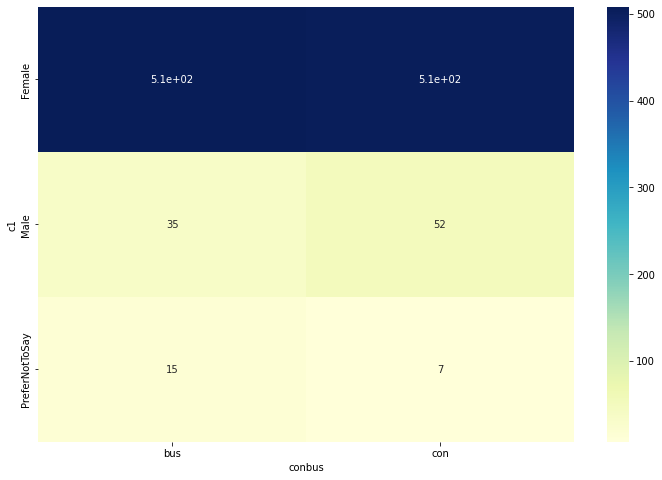

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot = True, cmap = "YlGnBu")

In [15]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9945044956563305

In [16]:
dof

2

In [17]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9945044956563305
Independent (H0 holds true)


In [18]:
contingency = pd.crosstab(cati['segnew2'], cati['conbus'])
contingency

conbus,bus,con
segnew2,,
FullTime,189,232
NotWorking,7,11
PartTime,34,45
PreferNotToSay,121,101
RetiredPrivatePention,141,118
RetiredStateBenefit,56,51
UnemployedNotAbleToWork,9,7
UnemployedSeekingWork,1,0


In [19]:
contingency_pct = pd.crosstab(cati['segnew2'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
segnew2,,
FullTime,0.338710,0.410619
NotWorking,0.012545,0.019469
PartTime,0.060932,0.079646
PreferNotToSay,0.216846,0.178761
RetiredPrivatePention,0.252688,0.208850
RetiredStateBenefit,0.100358,0.090265
UnemployedNotAbleToWork,0.016129,0.012389
UnemployedSeekingWork,0.001792,0.000000


<AxesSubplot:xlabel='conbus', ylabel='segnew2'>

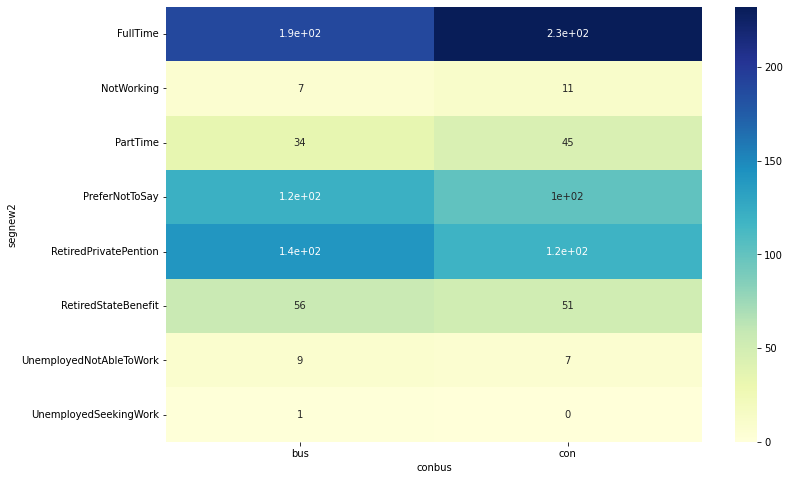

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot = True, cmap = "YlGnBu")

In [21]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9999999889525142

In [22]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9999999889525142
Independent (H0 holds true)


In [23]:
contingency = pd.crosstab(cati['c2'], cati['conbus'])
contingency

conbus,bus,con
c2,,
PreferNotToSay,27,20
_25to34,2,7
_35to44,18,24
_45to54,101,117
_55to64,180,198
_65Plus,230,199


In [24]:
contingency_pct = pd.crosstab(cati['c2'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
c2,,
PreferNotToSay,0.048387,0.035398
_25to34,0.003584,0.012389
_35to44,0.032258,0.042478
_45to54,0.181004,0.207080
_55to64,0.322581,0.350442
_65Plus,0.412186,0.352212


<AxesSubplot:xlabel='conbus', ylabel='c2'>

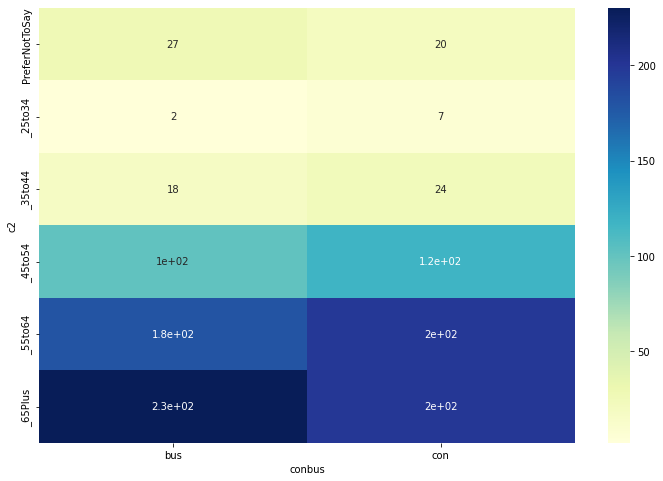

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot = True, cmap = "YlGnBu")

In [26]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9999983203162464

In [27]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9999983203162464
Independent (H0 holds true)


In [28]:
def conbus(row):
    if row['weekend'] == 1:
        return "con"
    elif row['weekend'] == 0 and cati.between_time('17:30:00', '07:00:00'):
        return "con"
    else:
        return "bus"

cati['conbus'] = cati.apply(conbus, axis=1)

TypeError: Index must be DatetimeIndex

In [29]:
cati = pd.get_dummies(cati, columns=['c1', 'c2', 'qsoc', 'segnew2'], drop_first = True)
cati.head()

,StartTime,day_of_week,Day,Time,weekend,conbus,c1_Male,c1_PreferNotToSay,c2__25to34,c2__35to44,...,qsoc_D,qsoc_E,qsoc_Refused,segnew2_NotWorking,segnew2_PartTime,segnew2_PreferNotToSay,segnew2_RetiredPrivatePention,segnew2_RetiredStateBenefit,segnew2_UnemployedNotAbleToWork,segnew2_UnemployedSeekingWork
0,2021-12-13 14:46:17,Monday,2021-12-13,14:46:17,0,bus,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-12-13 14:48:13,Monday,2021-12-13,14:48:13,0,bus,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-12-13 14:49:12,Monday,2021-12-13,14:49:12,0,bus,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2021-12-13 14:55:05,Monday,2021-12-13,14:55:05,0,bus,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2021-12-13 15:02:01,Monday,2021-12-13,15:02:01,0,bus,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [30]:
cati = pd.get_dummies(cati, columns = ['conbus'], drop_first = True)

In [31]:
grps = pd.unique(cati.conbus.values)
d_cati = {grp:cati[]}

SyntaxError: invalid syntax (Temp/ipykernel_6464/3445183081.py, line 2)